Рязанова Маргарита, ПМ22-6

# Задание

1. Скачать или получить любой датасет
2. При помощи библиотеки networkx построить граф на основе датасета

# Решение

Набор данных содержит героев и комиксы, а также отношения между ними. Набор данных разделен на три файла:
- 
nodes.csv : Содержит два столбца (узел, тип), указывающие имя и тип (комикс, герой) узло  в- 
edge.csv : Содержит два столбца (герой, комикс), указывающие, в каких комиксах появляются гер   о- и.
hero-edge.csv : Содержит сеть героев, которые появляются вместе в комиксvel/

In [18]:
import numpy as np 
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
nodes = pd.read_csv('C://Users//222868//Downloads//nodes.csv')
print(nodes.head())

                   node   type
0               2001 10  comic
1                2001 8  comic
2                2001 9  comic
3  24-HOUR MAN/EMMANUEL   hero
4  3-D MAN/CHARLES CHAN   hero


In [20]:
edges = pd.read_csv('C://Users//222868//Downloads//edges.csv')
print(edges.head())

                   hero   comic
0  24-HOUR MAN/EMMANUEL  AA2 35
1  3-D MAN/CHARLES CHAN   AVF 4
2  3-D MAN/CHARLES CHAN   AVF 5
3  3-D MAN/CHARLES CHAN   COC 1
4  3-D MAN/CHARLES CHAN  H2 251


In [21]:
hero_network = pd.read_csv('C://Users//222868//Downloads//hero-network.csv')
print(hero_network.head())

                  hero1                 hero2
0         LITTLE, ABNER        PRINCESS ZANDA
1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3         LITTLE, ABNER        PRINCESS ZANDA
4         LITTLE, ABNER  BLACK PANTHER/T'CHAL


In [24]:
Thor = hero_network[hero_network['hero1']=='THOR/DR. DONALD BLAK'].sample(25)
Thor.head()

,hero1,hero2
443974,THOR/DR. DONALD BLAK,CAPTAIN AMERICA
269601,THOR/DR. DONALD BLAK,TEMPEST II/NICOLETTE
76813,THOR/DR. DONALD BLAK,LORELEI II/MELODI [A
572278,THOR/DR. DONALD BLAK,CAPTAIN MARVEL II/MO
509847,THOR/DR. DONALD BLAK,QUICKSILVER/PIETRO M


In [25]:
Cap = Subset = hero_network[hero_network['hero1']=='CAPTAIN AMERICA'].sample(25)
Cap.head()

,hero1,hero2
51434,CAPTAIN AMERICA,MARVEL GIRL/JEAN GRE
480638,CAPTAIN AMERICA,"SUPERIA/WENTWORTH, D"
310291,CAPTAIN AMERICA,"JONES, RICHARD MILHO"
82913,CAPTAIN AMERICA,"JARVIS, EDWIN"
479130,CAPTAIN AMERICA,"RICHARDS, FRANKLIN B"


In [26]:
IronMan = hero_network[hero_network['hero1'].str.contains('IRON MAN/TONY STARK')].sample(25)
IronMan.head()

,hero1,hero2
107215,IRON MAN/TONY STARK,DAREDEVIL/MATT MURDO
308722,IRON MAN/TONY STARK,QUICKSILVER/PIETRO M
219411,IRON MAN/TONY STARK,GUNTHAR II
90539,IRON MAN/TONY STARK,IRON MAN DOPPELGANGE
209889,IRON MAN/TONY STARK,ANT-MAN/DR. HENRY J.


In [28]:
Subset = pd.concat([Thor,Cap,IronMan],axis = 0)
Subset.head()

,hero1,hero2
443974,THOR/DR. DONALD BLAK,CAPTAIN AMERICA
269601,THOR/DR. DONALD BLAK,TEMPEST II/NICOLETTE
76813,THOR/DR. DONALD BLAK,LORELEI II/MELODI [A
572278,THOR/DR. DONALD BLAK,CAPTAIN MARVEL II/MO
509847,THOR/DR. DONALD BLAK,QUICKSILVER/PIETRO M


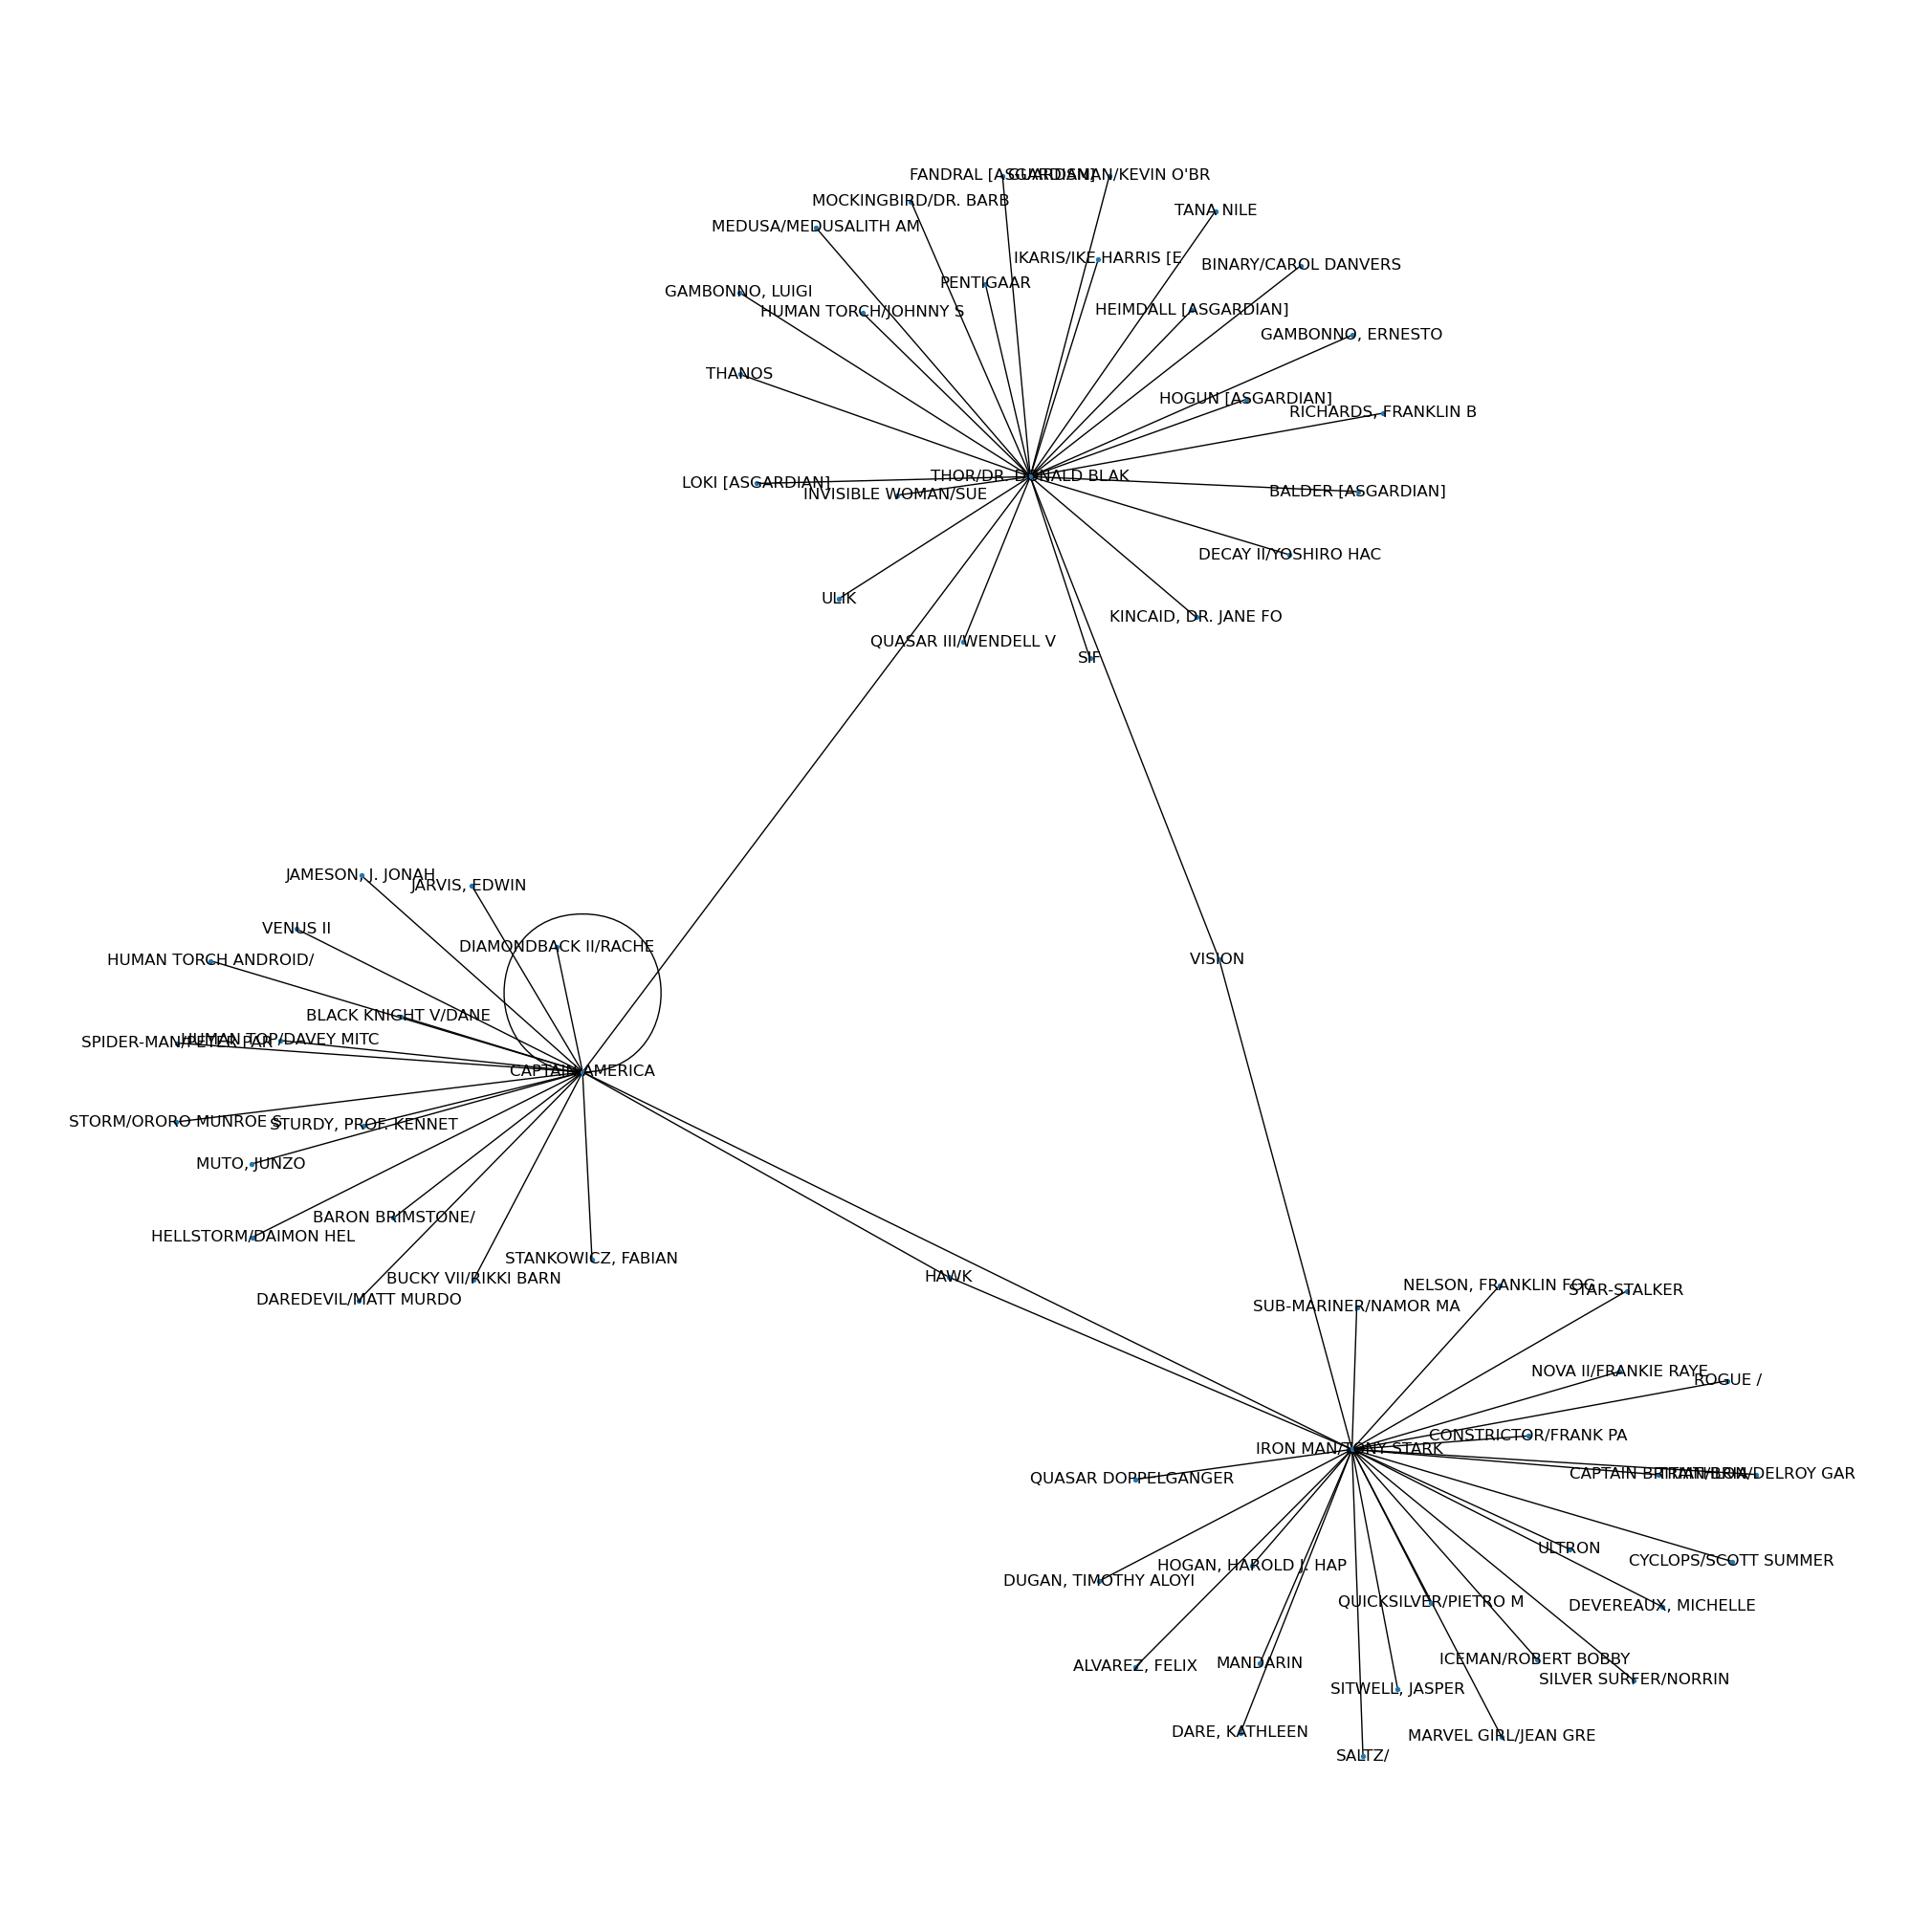

In [14]:
G = nx.from_pandas_edgelist(Subset, 'hero1', 'hero2')
plt.figure(figsize = (20,20))
nx.draw(G, with_labels=True, node_size = 8)
plt.show()

In [15]:
list(G.neighbors('CAPTAIN AMERICA'))

['JARVIS, EDWIN ',
 'DIAMONDBACK II/RACHE',
 'VENUS II',
 'SPIDER-MAN/PETER PAR',
 'MUTO, JUNZO',
 'IRON MAN/TONY STARK ',
 'THOR/DR. DONALD BLAK',
 'BUCKY VII/RIKKI BARN',
 'DAREDEVIL/MATT MURDO',
 'STORM/ORORO MUNROE S',
 'HAWK',
 'JAMESON, J. JONAH',
 'STANKOWICZ, FABIAN',
 'HUMAN TORCH ANDROID/',
 'CAPTAIN AMERICA',
 'HELLSTORM/DAIMON HEL',
 'STURDY, PROF. KENNET',
 'BARON BRIMSTONE/',
 'BLACK KNIGHT V/DANE ',
 'HUMAN TOP/DAVEY MITC']

In [16]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
[str(x) + '----' + str(y) for x,y in zip(G.nodes(),degrees)]

['THOR/DR. DONALD BLAK----25',
 'LOKI [ASGARDIAN]----1',
 'QUASAR III/WENDELL V----1',
 'THANOS----1',
 'SIF----1',
 'HOGUN [ASGARDIAN]----1',
 'BALDER [ASGARDIAN]----1',
 'GAMBONNO, LUIGI----1',
 'MEDUSA/MEDUSALITH AM----1',
 'KINCAID, DR. JANE FO----1',
 'IKARIS/IKE HARRIS [E----1',
 'PENTIGAAR----1',
 'ULIK----1',
 'TANA NILE----1',
 "GUARDSMAN/KEVIN O'BR----1",
 'VISION ----2',
 'BINARY/CAROL DANVERS----1',
 'DECAY II/YOSHIRO HAC----1',
 'MOCKINGBIRD/DR. BARB----1',
 'HEIMDALL [ASGARDIAN]----1',
 'FANDRAL [ASGARDIAN]----1',
 'RICHARDS, FRANKLIN B----1',
 'INVISIBLE WOMAN/SUE ----1',
 'HUMAN TORCH/JOHNNY S----1',
 'GAMBONNO, ERNESTO----1',
 'CAPTAIN AMERICA----20',
 'JARVIS, EDWIN ----1',
 'DIAMONDBACK II/RACHE----1',
 'VENUS II----1',
 'SPIDER-MAN/PETER PAR----1',
 'MUTO, JUNZO----1',
 'IRON MAN/TONY STARK ----26',
 'BUCKY VII/RIKKI BARN----1',
 'DAREDEVIL/MATT MURDO----1',
 'STORM/ORORO MUNROE S----1',
 'HAWK----2',
 'JAMESON, J. JONAH----1',
 'STANKOWICZ, FABIAN----1',
 'HUMAN TO

In [17]:
H=nx.from_pandas_edgelist(hero_network, 'hero1', 'hero2')
nx.shortest_path(H,'THOR/DR. DONALD BLAK','MOON KNIGHT DOPPELGA')

['THOR/DR. DONALD BLAK', 'MOON KNIGHT/MARC SPE', 'MOON KNIGHT DOPPELGA']